In [2]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [51]:
crime_data <- read_csv('crimedata_csv_AllNeighbourhoods_2022.csv') %>%
    mutate(TYPE = as_factor(TYPE),
          NEIGHBOURHOOD = as_factor(NEIGHBOURHOOD)) %>%
    drop_na()
head(crime_data)

Rows: 34256 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Theft from Vehicle,2022,2,19,13,0,11XX E PENDER ST,Strathcona,494090.1,5458587
Theft from Vehicle,2022,1,1,12,0,11XX FRANKLIN ST,Strathcona,494139.1,5458847
Theft from Vehicle,2022,11,29,4,33,11XX GARDEN DR,Grandview-Woodland,495790.8,5457996
Theft from Vehicle,2022,3,2,18,0,11XX GILFORD ST,West End,489647.2,5459582
Theft from Vehicle,2022,5,20,9,45,11XX GILFORD ST,West End,489647.9,5459583
Theft from Vehicle,2022,6,18,22,0,11XX GILFORD ST,West End,489667.9,5459616


In [58]:
crime_data_2 <- crime_data %>%
    filter(NEIGHBOURHOOD == c('Strathcona', 'West End')) %>%
    select(TYPE, NEIGHBOURHOOD) %>%
    group_by(NEIGHBOURHOOD) %>%
    filter(TYPE == 'Theft from Vehicle') %>%
    summarise(n = n()) %>%
    mutate(mean = n/theft_total)

crime_data_2

theft_total <- crime_data %>%
    filter(TYPE == 'Theft from Vehicle') %>%
    summarise(n = n()) %>%
    pull()


theft_total

NEIGHBOURHOOD,n,mean
<fct>,<int>,<dbl>
Strathcona,235,0.03231573
West End,314,0.04317932


[1] 7272

In [77]:
# select crime_data with only chosen neighborhood and type
crime_data_clean <- crime_data %>%
    drop_na() %>%
    select(TYPE, NEIGHBOURHOOD) %>%
    group_by(TYPE)


head(crime_data_clean)

crime_data_total <- crime_data_clean %>%
    filter(TYPE !='Homicide') %>%
    summarise(total = n())
    

west_end_n <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == 'West End') %>%
    summarise(westend = n())

strathcona_n <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == 'Strathcona') %>%
    filter(TYPE !='Homicide') %>%
    summarise(Strathcona = n())


crime_data_sum <- crime_data_total %>%
    inner_join(west_end_n, by = 'TYPE') %>%
    inner_join(strathcona_n, by = 'TYPE') %>%
    mutate(westend_prop = westend/total) %>%
    mutate(strathcona_prop = Strathcona/total) %>%
    mutate(prop_diff = westend_prop - strathcona_prop) %>%
    mutate(westend_mean = mean(westend))

crime_data_total
crime_data_sum
summary(crime_data_clean)

TYPE,NEIGHBOURHOOD
<fct>,<fct>
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Grandview-Woodland
Theft from Vehicle,West End
Theft from Vehicle,West End
Theft from Vehicle,West End


TYPE,total
<fct>,<int>
Theft from Vehicle,7272
Theft of Bicycle,1526
Theft of Vehicle,910
Vehicle Collision or Pedestrian Struck (with Fatality),19
Vehicle Collision or Pedestrian Struck (with Injury),1010
Break and Enter Commercial,1985
Break and Enter Residential/Other,1266
Mischief,5613
Offence Against a Person,3891


TYPE,total,westend,Strathcona,westend_prop,strathcona_prop,prop_diff,westend_mean
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Theft from Vehicle,7272,640,476,0.08800880,0.06545655,0.022552255,287.4
Theft of Bicycle,1526,181,59,0.11861075,0.03866317,0.079947575,287.4
Theft of Vehicle,910,49,75,0.05384615,0.08241758,-0.028571429,287.4
Vehicle Collision or Pedestrian Struck (with Fatality),19,2,4,0.10526316,0.21052632,-0.105263158,287.4
Vehicle Collision or Pedestrian Struck (with Injury),1010,64,66,0.06336634,0.06534653,-0.001980198,287.4
Break and Enter Commercial,1985,209,133,0.10528967,0.06700252,0.038287154,287.4
Break and Enter Residential/Other,1266,29,81,0.02290679,0.06398104,-0.041074250,287.4
Mischief,5613,382,550,0.06805630,0.09798682,-0.029930518,287.4
Offence Against a Person,3891,488,567,0.12541763,0.14572089,-0.020303264,287.4


                         TYPE                         NEIGHBOURHOOD  
 Other Theft               :10749   Central Business District:10638  
 Theft from Vehicle        : 7272   West End                 : 2874  
 Mischief                  : 5613   Strathcona               : 2600  
 Offence Against a Person  : 3891   Renfrew-Collingwood      : 2355  
 Break and Enter Commercial: 1985   Mount Pleasant           : 2261  
 Theft of Bicycle          : 1526   Fairview                 : 1671  
 (Other)                   : 3216   (Other)                  :11853  

Warning message in `==.default`(NEIGHBOURHOOD, c("West End", "Strathcona")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(NEIGHBOURHOOD, c("West End", "Strathcona")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(NEIGHBOURHOOD, c("West End", "Strathcona")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(NEIGHBOURHOOD, c("West End", "Strathcona")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object leng

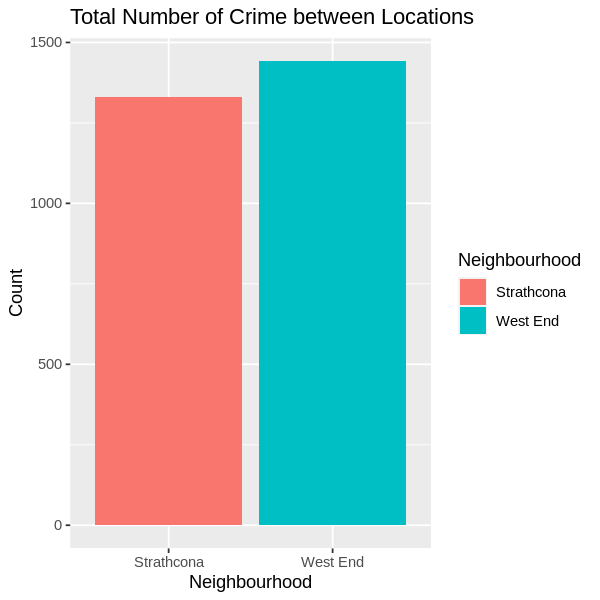

In [60]:
options(repr.plot.width = 5, repr.plot.height = 5)
pop <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == c('West End', 'Strathcona')) %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(n=n())

pop_plot <- pop %>%
    ggplot(aes(x=NEIGHBOURHOOD, y=n, fill = NEIGHBOURHOOD)) +
    geom_bar(stat = 'identity') +
    labs(x = "Neighbourhood",
       y = "Count", 
       fill = "Neighbourhood",
       title = "Total Number of Crime between Locations")
pop_plot

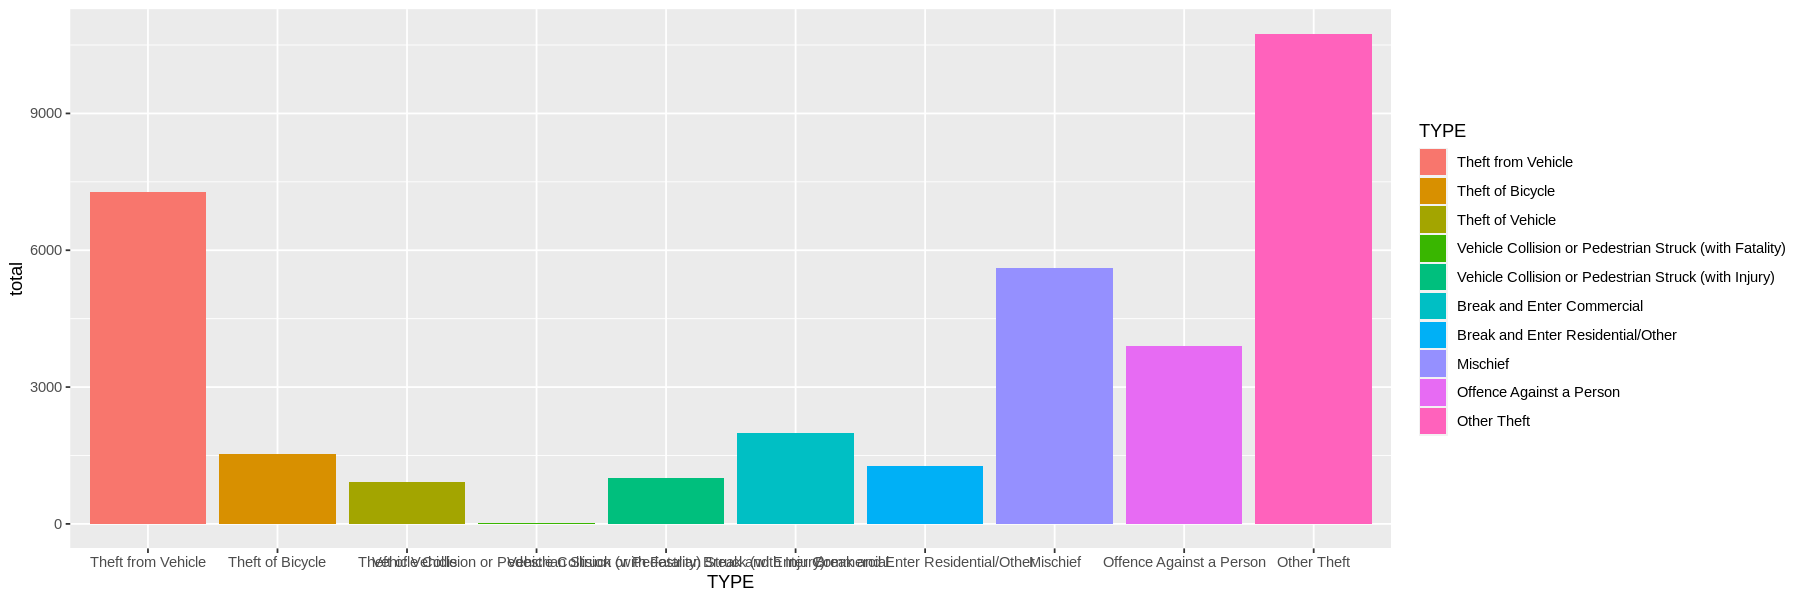

In [40]:
options(repr.plot.width = 15, repr.plot.height = 5)
westend_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y=westend, fill=TYPE)) +
    geom_bar(stat = 'identity')

westend_sum_plot

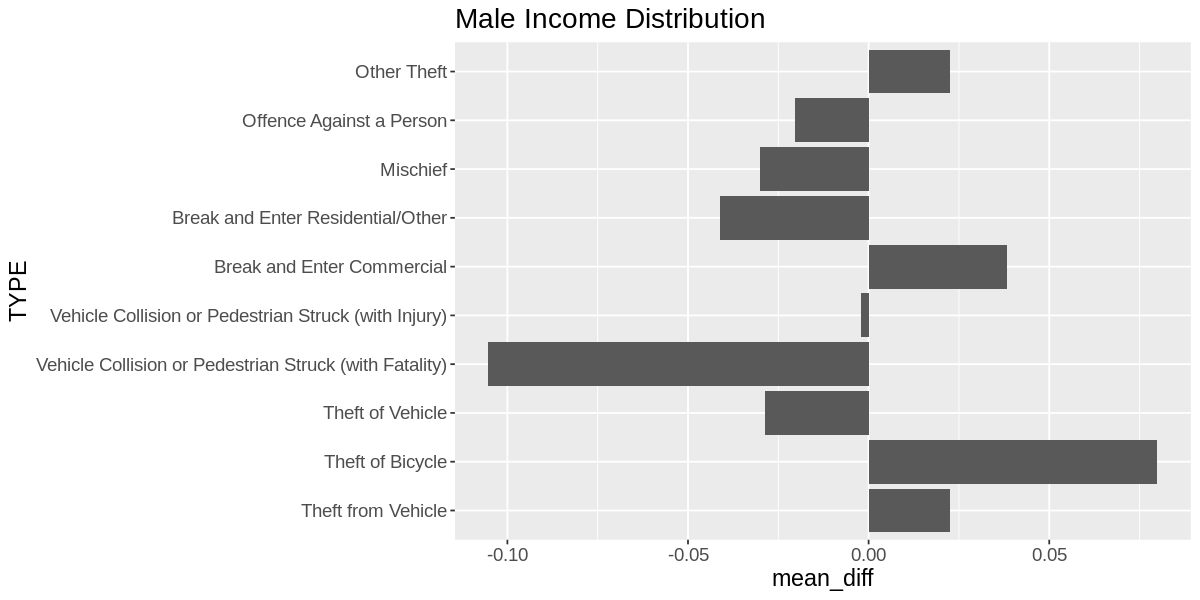

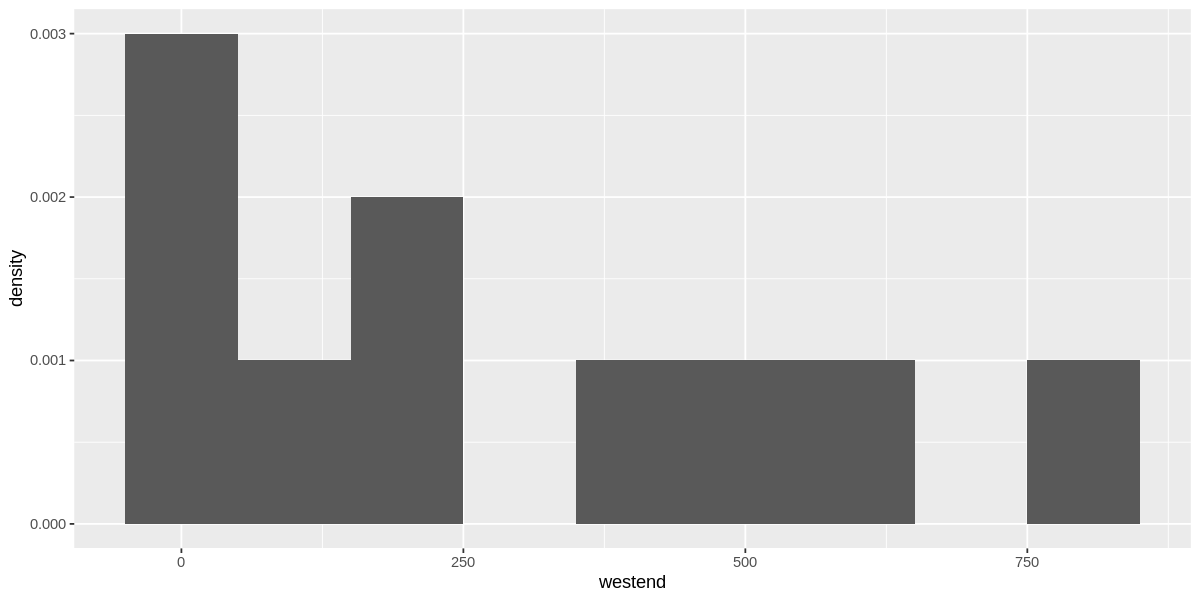

In [73]:
options(repr.plot.width = 10, repr.plot.height = 5)

mean_diff_plot <- crime_data_sum %>%  
    ggplot(aes(mean_diff, y = TYPE), fill = TYPE) +
    geom_bar(stat = 'identity') +
    ggtitle("Male Income Distribution") +
    theme(text = element_text(size = 14))

westend_dis <- crime_data_sum %>%
    ggplot(aes(westend, y=..density..)) +
    geom_histogram(binwidth = 100)

mean_diff_plot
westend_dis

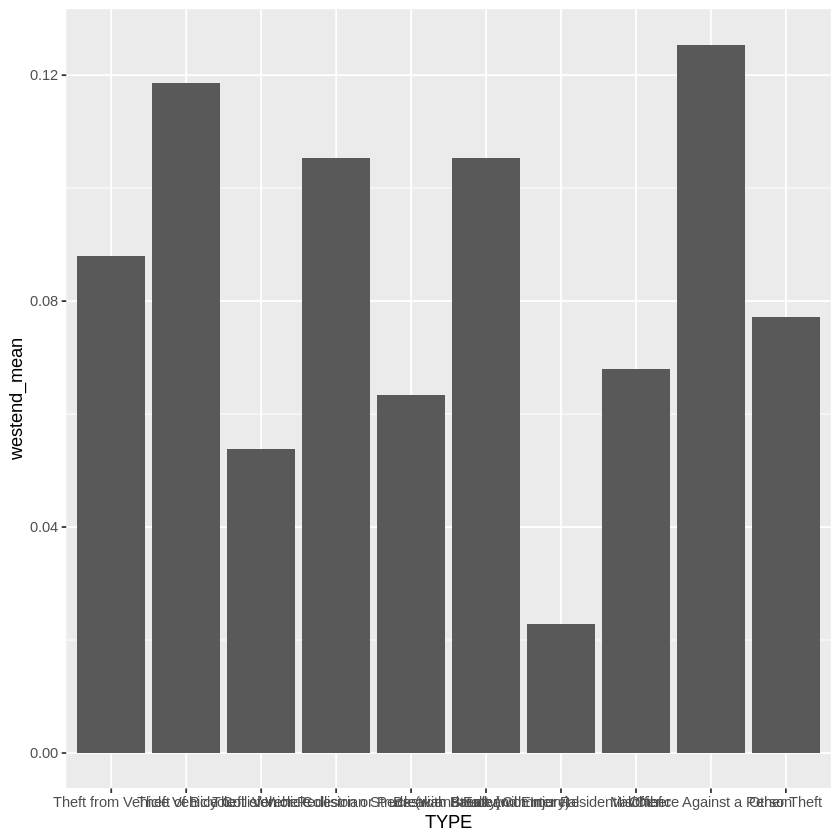

In [11]:
westend_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y=westend_mean)) +
    geom_bar(stat = 'identity')



westend_plot